##**N.Sri Abhinav**
##Lab-4

AM.EN.U4CSE19137

S6 CSE-B

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('imdb.csv')

In [ ]:
data.shape

(50000, 2)

In [ ]:
data = data[:1000]

In [ ]:
data['review'].dropna(inplace=True)

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'].value_counts()

positive    501
negative    499
Name: sentiment, dtype: int64

# Dataset Cleaning

In [ ]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re

cleaned_review = []
stopwds = stopwords.words('english')
for ind in range(len(data['review'])):
    review = data.iloc[ind, 0]
    sentences = sent_tokenize(review)
    cleaned_sentence = list()
    for sentence in sentences:
        words = sentence.split()
        new_words = []
        temp_word = list()
        for word in words:
            word = word.lower()
            if word not in stopwds and word != 'br' and word.isalpha():
                temp_word.append(re.sub(r'[^\w\s]', '', word))
        cleaned_sentence.append(' '.join(temp_word))
    cleaned_review.append(' '.join(cleaned_sentence))
data['cleaned_review'] = cleaned_review
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ex...
1,A wonderful little production. <br /><br />The...,positive,wonderful little filming technique fashion giv...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer si...
3,Basically there's a family where a little boy ...,negative,basically family little boy thinks zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter time visually stunning film mattei offe...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(data['cleaned_review']).toarray()
print(cv.vocabulary_)
print(len(x[0]))
x

{'one': 8965, 'reviewers': 10811, 'mentioned': 8104, 'watching': 14142, 'oz': 9163, 'episode': 4332, 'exactly': 4463, 'happened': 5817, 'first': 4911, 'thing': 13044, 'struck': 12467, 'brutality': 1612, 'unflinching': 13629, 'scenes': 11238, 'set': 11478, 'right': 10868, 'word': 14401, 'trust': 13432, 'show': 11632, 'faint': 4658, 'hearted': 5932, 'pulls': 10092, 'punches': 10100, 'regards': 10494, 'sex': 11495, 'classic': 2274, 'use': 13801, 'called': 1759, 'nickname': 8705, 'given': 5442, 'oswald': 9061, 'maximum': 8000, 'security': 11360, 'state': 12287, 'focuses': 5020, 'mainly': 7802, 'emerald': 4175, 'experimental': 4553, 'section': 11356, 'prison': 9934, 'cells': 1991, 'glass': 5455, 'fronts': 5204, 'face': 4631, 'privacy': 9939, 'high': 6029, 'em': 4155, 'city': 2248, 'home': 6114, 'irish': 6797, 'death': 3207, 'dodgy': 3757, 'dealings': 3201, 'shady': 11509, 'agreements': 263, 'never': 8679, 'far': 4697, 'would': 14435, 'say': 11208, 'main': 7800, 'appeal': 568, 'due': 3950, '

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ex...
1,A wonderful little production. <br /><br />The...,1,wonderful little filming technique fashion giv...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer si...
3,Basically there's a family where a little boy ...,0,basically family little boy thinks zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter time visually stunning film mattei offe...


# Splitting the dataset to train and test

In [ ]:
from sklearn.model_selection import train_test_split

y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

knn_f1_score = f1_score(y_test, y_pred)
print(knn_f1_score)

0.6417112299465241


# Rocchio Classifier

In [ ]:
from sklearn.neighbors import NearestCentroid

rocchio = NearestCentroid()
rocchio.fit(X_train, y_train)
y_pred = rocchio.predict(X_test)
roc_f1_score = f1_score(y_pred, y_test)
print(roc_f1_score)

0.6644951140065146


# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
mnb_f1_score = f1_score(y_test, y_pred)
print(mnb_f1_score)

0.759124087591241


# Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
bnb_f1_score = f1_score(y_test, y_pred)
print(bnb_f1_score)

0.7035573122529645


# Result Comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


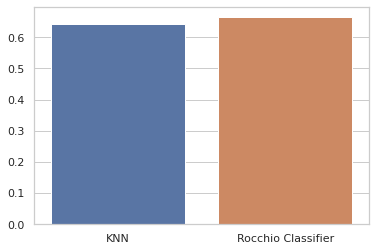

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.barplot(["KNN","Rocchio Classifier"],[knn_f1_score, roc_f1_score])
plt.show()

From the above graph it is clear that Rocchio Classifier offers slightly better performance when compared to KNN. Rocchio classifier has an f1 score of ***0.66*** while KNN has an f1 score of ***0.64***.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


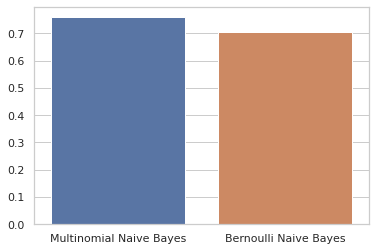

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(["Multinomial Naive Bayes","Bernoulli Naive Bayes"],[mnb_f1_score, bnb_f1_score])
plt.show()

Here it can be seen that Multinomial Naive Bayes classifier has better performance when compared to Bernoulli Naive Bayes classifier with an f1 score of ***0.75***.